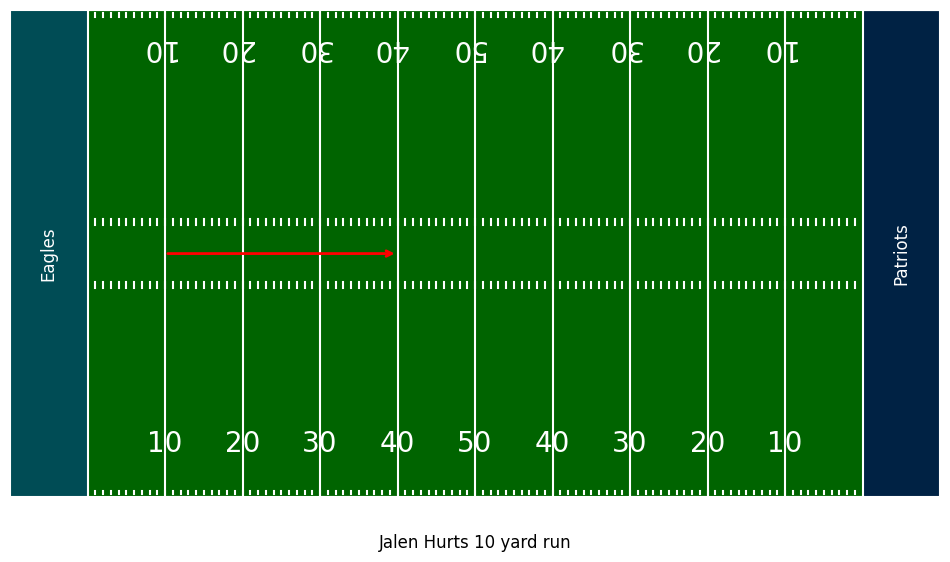

In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd

def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    
    plt.xlim(0, 120)
    plt.ylim(0, 53.3)
    plt.axis('off')
    
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white', rotation=180)
    
    hash_range = range(11, 110)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
                 color='yellow')
    
    return fig, ax

def draw_football_field(team1_name, team2_name, play_description):
    fig, ax = create_football_field(linenumbers=True, endzones=True, highlight_line=False, fifty_is_los=False, figsize=(12, 6.33))
    
    field_length = 120  # Adjusted for the football field's dimensions
    field_width = 53.3
    
    # Set colors based on team names
    if "Eagles" in team1_name:
        endzone1_color = '#004C55'
        text_color1 = 'white'
    else:
        endzone1_color = 'blue'  # Default color
        text_color1 = 'black'
    
    if "Eagles" in team2_name:
        endzone2_color = '#004C55'
        text_color2 = 'white'
    else:
        endzone2_color = 'blue'  # Default color
        text_color2 = 'black'
    
    if "Patriots" in team1_name:
        endzone1_color = '#002244'
        text_color1 = 'white'
    
    if "Patriots" in team2_name:
        endzone2_color = '#002244'
        text_color2 = 'white'
    
    if "Commanders" in team1_name:
        endzone1_color = '#5A1414'
        text_color1 = 'FFB612'
    
    if "Commanders" in team2_name:
        endzone2_color = '#5a1414'
        text_color2 = '#FFB612'
    
    # Draw the colored end zones
    endzone1 = patches.Rectangle((0, 0), 10, field_width, linewidth=0.1, edgecolor='r', facecolor=endzone1_color)
    endzone2 = patches.Rectangle((110, 0), 10, field_width, linewidth=0.1, edgecolor='r', facecolor=endzone2_color)
    ax.add_patch(endzone1)
    ax.add_patch(endzone2)
    
    # Add team names to endzones
    plt.text(5, field_width/2, team1_name, ha='center', va='center', fontsize=12, color=text_color1, rotation='vertical')
    plt.text(115, field_width/2, team2_name, ha='center', va='center', fontsize=12, color=text_color2, rotation='vertical')
    
    # Add play description
    plt.text(field_length/2, -5, play_description, ha='center', va='center', fontsize=12)
    
    # Draw arrow representing the play
    arrow_start_x = 20
    arrow_end_x = 50
    arrow_props = dict(arrowstyle='->', linewidth=2, color='red')
    ax.annotate('', xy=(arrow_end_x, field_width/2), xytext=(arrow_start_x, field_width/2), arrowprops=arrow_props)
    
    # Show the plot
    plt.show()

# Get team names and play description from user input
team1 = input("Enter the name of the first team: ")
team2 = input("Enter the name of the second team: ")
play_desc = input("Enter the play description: ")

# Call the function to draw the football field with
draw_football_field(team1, team2, play_desc)


In [2]:
import pandas as pd

# Load the play-by-play data for the specific year
YEAR = 2023
data = pd.read_csv('https://github.com/nflverse/nflverse-data/releases/download/pbp/' \
                   'play_by_play_' + str(YEAR) + '.csv.gz',
                   compression='gzip', low_memory=False)

# Display the data for reference
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 400)
print(data.head())


   play_id          game_id  old_game_id home_team away_team season_type  \
0        1  2023_01_ARI_WAS   2023091007       WAS       ARI         REG   
1       39  2023_01_ARI_WAS   2023091007       WAS       ARI         REG   
2       55  2023_01_ARI_WAS   2023091007       WAS       ARI         REG   
3       77  2023_01_ARI_WAS   2023091007       WAS       ARI         REG   
4      102  2023_01_ARI_WAS   2023091007       WAS       ARI         REG   

   week posteam posteam_type defteam side_of_field  yardline_100   game_date  \
0     1     NaN          NaN     NaN           NaN           NaN  2023-09-10   
1     1     WAS         home     ARI           ARI          35.0  2023-09-10   
2     1     WAS         home     ARI           WAS          75.0  2023-09-10   
3     1     WAS         home     ARI           WAS          72.0  2023-09-10   
4     1     WAS         home     ARI           WAS          66.0  2023-09-10   

   quarter_seconds_remaining  half_seconds_remaining  game_sec

In [3]:
# Filter out a specific play by play_id (as an example)
play_id = 2104
play_data = data[data['play_id'] == play_id].iloc[0]

# Extract relevant details for animation
desc = play_data['desc']
yards_gained = play_data['yards_gained']
start_yardline = play_data['yardline_100']

print(f"Description: {desc}")
print(f"Yards Gained: {yards_gained}")
print(f"Start Yardline: {start_yardline}")


Description: (1:12) (No Huddle, Shotgun) 4-D.Prescott pass short left to 20-T.Pollard ran ob at DAL 34 for 2 yards (20-Ma.Wilson).
Yards Gained: 2.0
Start Yardline: 68.0


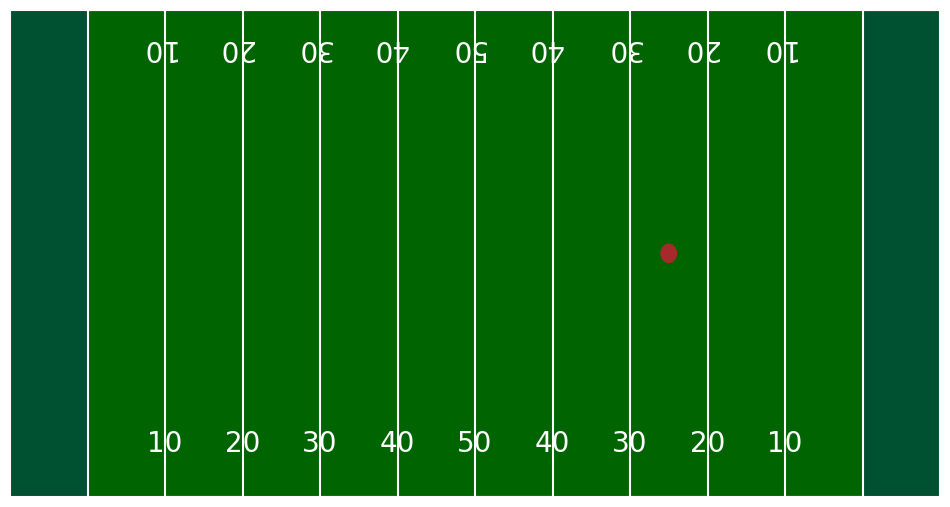

In [7]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
import pandas as pd

# Function to create football field
def create_football_field(linenumbers=True, endzones=True, figsize=(12, 6.33)):
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)
    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    
    plt.xlim(0, 120)
    plt.ylim(0, 53.3)
    plt.axis('off')
    
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,
                     color='white', rotation=180)
    
    return fig, ax

# Function to animate the play
def animate_play(fig, ax, start_yardline, yards_gained):
    ball = plt.Circle((start_yardline + 10, 26.65), 1, color='brown', zorder=5)
    ax.add_patch(ball)

    def animate(i):
        new_x = start_yardline + 10 + (i / 10) * yards_gained
        ball.set_center((new_x, 26.65))
        return ball,

    anim = FuncAnimation(fig, animate, frames=10, interval=200, blit=True)
    plt.show()

# Example values for play description
start_yardline = 75  # Start at the 25-yard line of the offense
yards_gained = 25  # Example: play gains 25 yards

# Create the football field
fig, ax = create_football_field()

# Animate the play
animate_play(fig, ax, start_yardline, yards_gained)
